# Regression to Compare Variables in Facebook Campaigns
## By Nicole Haberer
## Created for APRD6342

In [1]:
import pandas as pd
from pandas import DataFrame 
import numpy
import statsmodels.api as sm
import seaborn as sns

In [5]:
#assigns filename into string variable
pony = pd.read_csv(r"C:\Users\andis\Desktop\MSBA Classes\Working Directory\Travel Pony Facebook.csv")

In [6]:
#remove rows with zeros in amount spent column
pony2 = pony[pony['Amount Spent (USD)'] != 0]

C:\Users\andis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


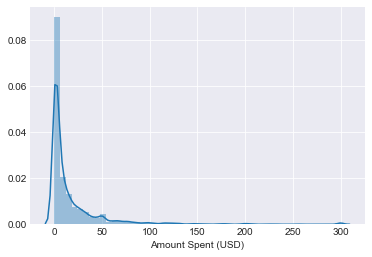

In [7]:
# 1. Graph histogram
sns.set_style('darkgrid')
sns.distplot(pony2['Amount Spent (USD)'])

In [9]:
# 2. Multiple Regression Analysis
# make campaign_name into a categorical variable
pony2['Campaign Code'] = pony2['Campaign Name'].astype('category')
pony2['Campaign Code 2'] = pony2['Campaign Code'].cat.codes

#assign variables to be used in regression
X = pony2[['Campaign Code 2', 'Reach','Frequency','Impressions', 'Clicks', 'Unique Clicks','Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
X = sm.add_constant(X)
y = pony2['Amount Spent (USD)']

#run regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

#3 What are the three predictors with the highest predictive value by rank.
# #1 Page Likes         coefficient = 23.0417 
# #2 Post Engagement    coefficient = 16.8084
# #3 Frequency          coefficient =  4.4988

C:\Users\andis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1743.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:14:13   Log-Likelihood:                -6591.5
No. Observations:                1802   AIC:                         1.321e+04
Df Residuals:                    1788   BIC:                         1.329e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2165      1.531     -5.366      0.000     -11.220      -5.213
Campaign Code 2     0.0135      0.002      5.979      0.000       0.009       0.018
Reach               0.0036      0.000     23.278      0.000       0.003       0.004
Frequency           4.4988      1.438      3.128      0.002       1.678       7.320
Impressions        -0.0013   6.05e-05    -21.458      0.000      -0.001      -0.001
Clicks             -0.1742      0.111     -1.569      0.117      -0.392       0.044
Unique Clicks       0.3073      0.126      2.444      0.015       0.061       0.554
Page Likes         23.0417      9.444      2.440      0.015       4.520      41.564
Page Engagement   -19.7454      9.440     -2.092      0.037     -38.261      -1.230
Post Engagement    16.8084      7.868      2.136      0.033       1.378      32.239
Post Likes          2.3714      1.578      1.502      0.133      -0.724       5.467
Post Comments       3.4253      1.641      2.087      0.037       0.207       6.644
Post Shares         4.4798      1.602      2.797      0.005       1.339       7.621
Photo Views         3.1556      1.577      2.002      0.045       0.064       6.248
Website Clicks      3.3764      1.577      2.142      0.032       0.284       6.468
==============================================================================
Omnibus:                      878.966   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26666.114
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                      21.544   Cond. No.                     1.08e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""